In [2]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

conf = pyspark.SparkConf().setAppName('appName').setMaster('local')
sc = SparkContext.getOrCreate(conf)
spark = SparkSession(sc)

In [93]:
import talib

stockShema = StructType([
  StructField("Date", StringType(), False),
  StructField("Open", FloatType(), False),
  StructField("High", FloatType(), False),
  StructField("Low", FloatType(), False),
  StructField("Close", FloatType(), False),
  StructField("Adj Close", FloatType(), False),
  StructField("Volume", FloatType(), False),
])

rdd = spark.read.csv('TSLA.csv', schema=stockShema, header=True)


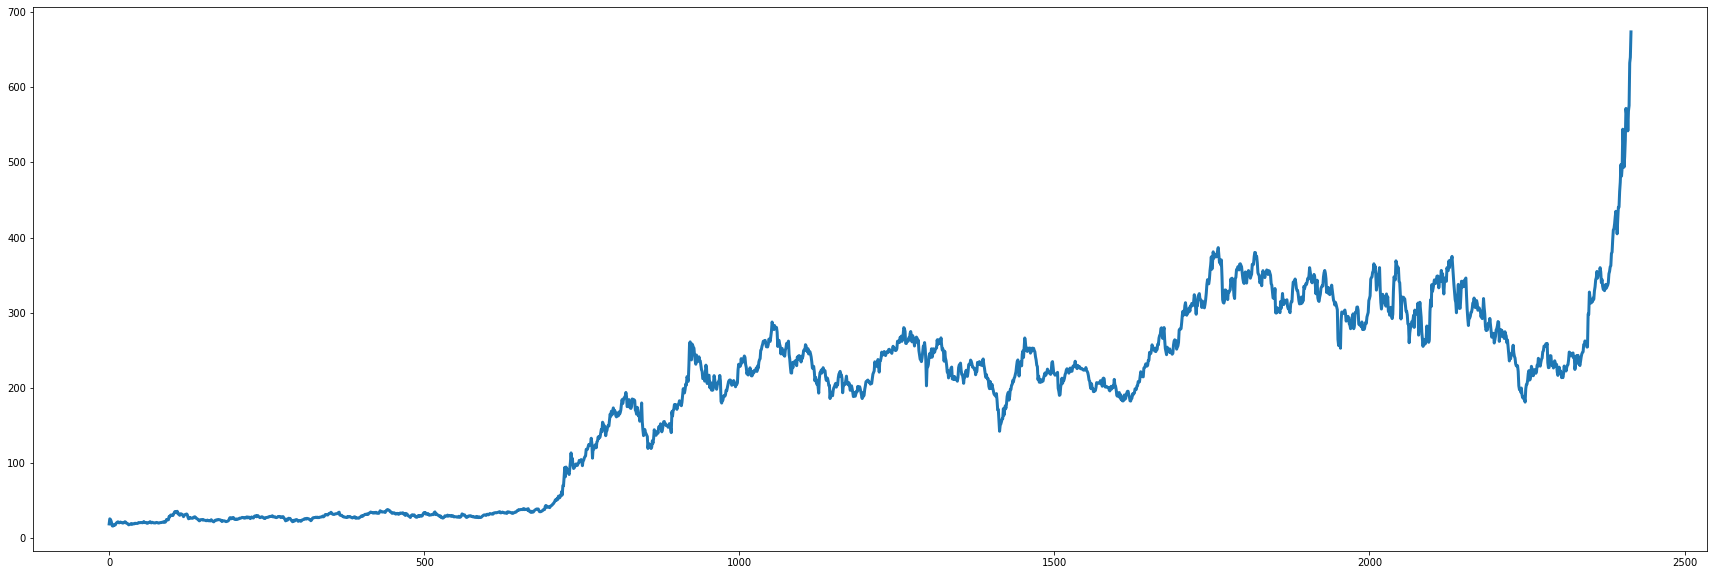

In [4]:
plt.figure(figsize=(30,10))

plt.plot(rdd.select('Open').toPandas(), linewidth=3)

In [81]:
open_mean = rdd.select('Open').toPandas().mean()

df = rdd.withColumn('Mean Squares', (rdd['Open'] - float(open_mean))**2).withColumn('Square Mean Squares', col('Mean Squares') ** .5)

df.show()

+----------+-----+-----+-----+-----+---------+---------+------------------+-------------------+
|      Date| Open| High|  Low|Close|Adj Close|   Volume|      Mean Squares|Square Mean Squares|
+----------+-----+-----+-----+-----+---------+---------+------------------+-------------------+
|2010-06-29| 19.0| 25.0|17.54|23.89|    23.89|1.87663E7| 27979.63207656541| 167.27113342285156|
|2010-06-30|25.79|30.42| 23.3|23.83|    23.83|1.71871E7|25754.193890833354| 160.48113250732422|
|2010-07-01| 25.0|25.92|20.27|21.96|    21.96|8218800.0| 26008.37847549119| 161.27113342285156|
|2010-07-02| 23.0| 23.1|18.71| 19.2|     19.2|5139800.0|26657.463009182597| 163.27113342285156|
|2010-07-06| 20.0| 20.0|15.83|16.11|    16.11|6866900.0|27646.089809719706| 166.27113342285156|
|2010-07-07| 16.4|16.63|14.98| 15.8|     15.8|6921700.0|28856.202099965627|  169.8711338043213|
|2010-07-08|16.14|17.52|15.57|17.46|    17.46|7711400.0|28944.602767423727| 170.13113403320312|
|2010-07-09|17.58| 17.9|16.55| 17.4|    

In [139]:
rdd = sc.parallelize(range(1,10))

rdd.map(lambda x: x**2).collect()

[1, 4, 9, 16, 25, 36, 49, 64, 81]

In [140]:
sch = StructType([
        StructField('a', IntegerType(), False),
        StructField('b', IntegerType(), False),
        StructField('c', IntegerType(), False),
        StructField('i', IntegerType(), False)
    ]
)

t = [
    (1, 2),
    (5, 3),
    (1, 56),
    (1, 4)
]

d = spark.createDataFrame(rdd, schema=sch)

d

DataFrame[a: int, b: int, c: int, i: int]